In [1]:
%matplotlib inline

In [2]:
import mne
import os

from mne.preprocessing import (ICA, corrmap, create_ecg_epochs,
                               create_eog_epochs)

In [13]:
#raw = mne.io.read_raw_edf("eeg_data\\PN00-1.edf", preload=True)
#raw = mne.io.read_raw_edf("aaaaaanr_s001_t001.edf", preload=True)
#raw = mne.io.read_raw_edf("aaaaaawu_s001_t001.edf", preload=True)
raw = mne.io.read_raw_edf("aaaaaebo_s001_t000.edf", preload=True)
#raw = mne.io.read_raw_edf("aaaaabdn_s001_t000.edf", preload=True)

Extracting EDF parameters from C:\Users\shamd\aaaaaebo_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 318749  =      0.000 ...  1274.996 secs...


In [14]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2006-04-13 09:03:55 UTC
 nchan: 41
 projs: []
 sfreq: 250.0 Hz
>


In [130]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [5]:
standard_montage = mne.channels.make_standard_montage('standard_1020')
print(standard_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


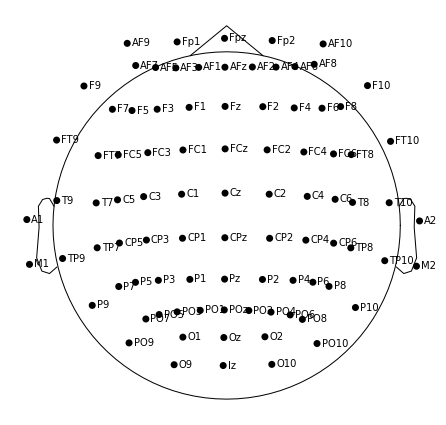

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


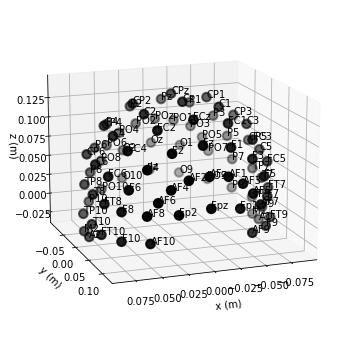

In [6]:
standard_montage.plot()  # 2D
fig = standard_montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [170]:
raw.rename_channels(lambda x: x.strip().replace('EEG ', ''))

<RawEDF | aaaaabdn_s001_t000.edf, 33 x 376500 (1506.0 s), ~94.8 MB, data loaded>

In [7]:
#raw.set_montage('brainproducts-RNP-BA-128')

In [8]:
#raw.plot(duration = 5)
#raw.plot_sensors(show_names=True)

In [15]:
raw.set_channel_types({'EEG EKG-LE': 'ecg'})

<RawEDF | aaaaaebo_s001_t000.edf, 41 x 318750 (1275.0 s), ~99.7 MB, data loaded>

In [16]:
raw_highpass = raw.copy().filter(l_freq = 2, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


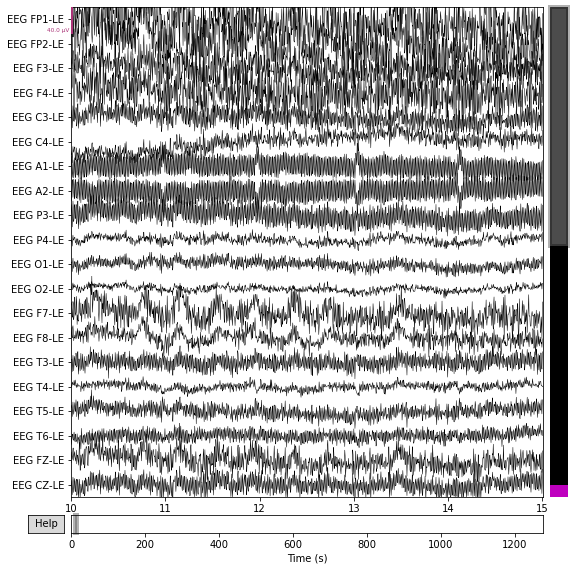

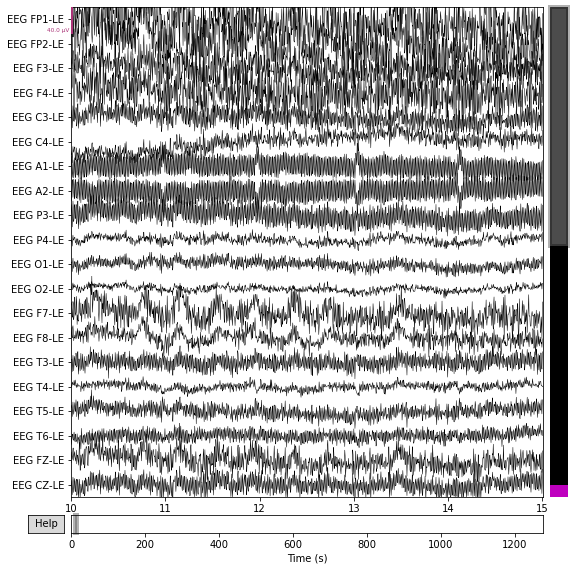

In [21]:
raw.plot(start=10, duration = 5)

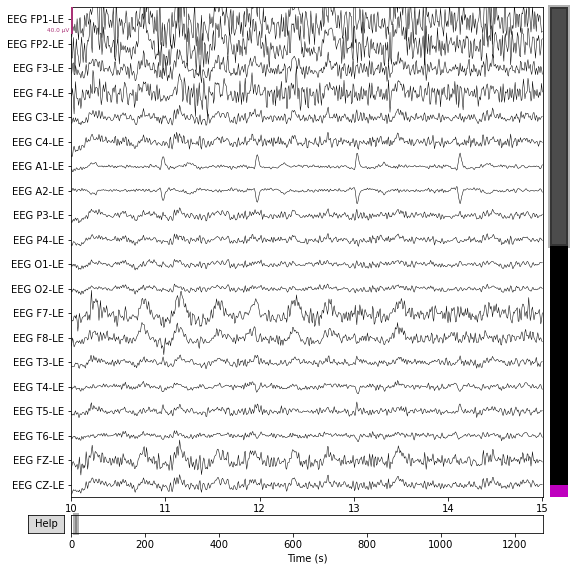

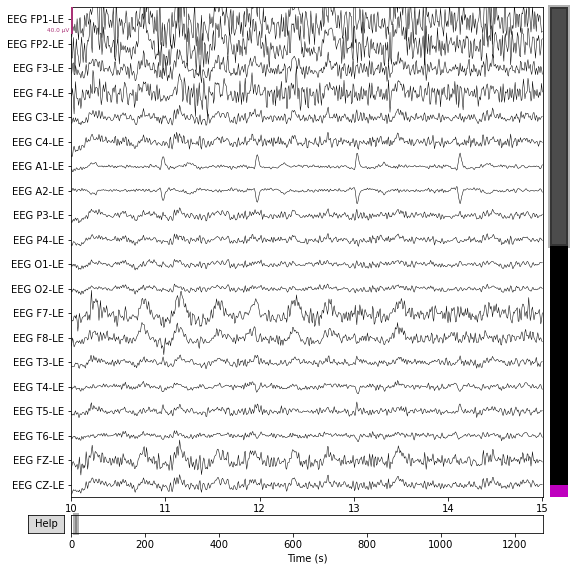

In [22]:
raw_highpass.plot(start=10, duration = 5)

Effective window size : 1.024 (s)


<ipython-input-25-e6057b300350>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
C:\Users\shamd\Jupyter_Notebook\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


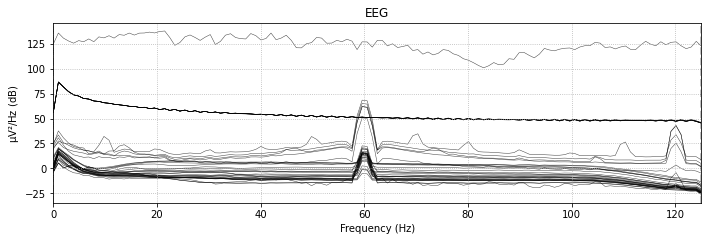

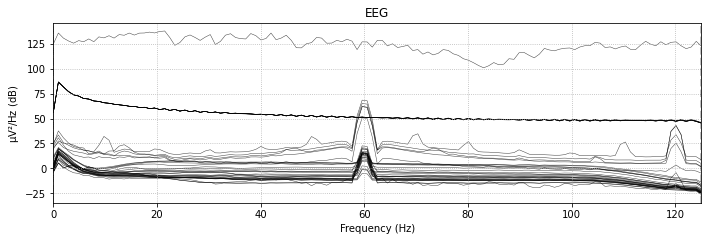

In [25]:
raw.compute_psd().plot()

Effective window size : 1.024 (s)


<ipython-input-24-51b59d52f2c3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_highpass.compute_psd().plot()
C:\Users\shamd\Jupyter_Notebook\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


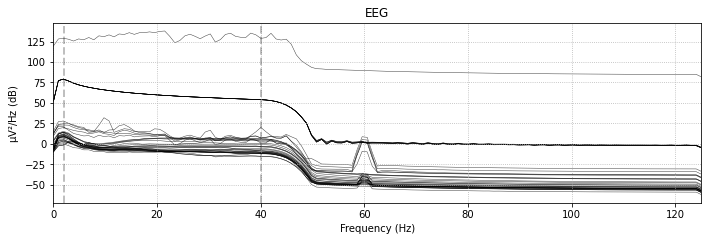

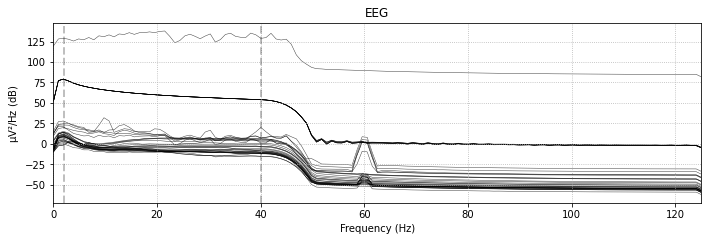

In [24]:
raw_highpass.compute_psd().plot()

In [128]:
ica = ICA(n_components=0.999999, max_iter='auto', random_state=97)
ica.fit(raw_highpass)
ica

Fitting ICA to data using 33 channels (please be patient, this may take a while)


RuntimeError: One PCA component captures most of the explained variance (99.99999996340284%), your threshold results in 1 component. You should select a higher value.

In [124]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f'Fraction of {channel_type} variance explained by all components: '
        f'{ratio}'
    )


Fraction of eeg variance explained by all components: 0.9999999999677601


In [125]:
explained_var_ratio = ica.get_explained_variance_ratio(
    filt_raw,
    components=[0],
    ch_type='eeg'
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio['eeg'])
print(
    f'Fraction of variance in EEG signal explained by first component: '
    f'{ratio_percent}%'
)

Fraction of variance in EEG signal explained by first component: 86%


Creating RawArray with float64 data, n_channels=7, n_times=303500
    Range : 0 ... 303499 =      0.000 ...  1213.996 secs
Ready.


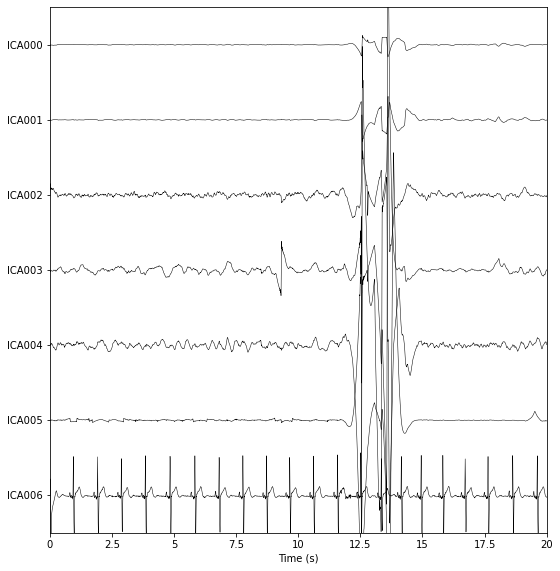

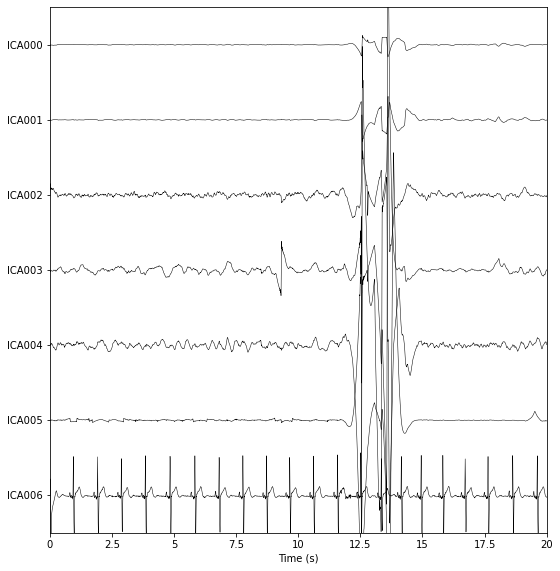

In [127]:
raw.load_data()
ica.plot_sources(raw_highpass, show_scrollbars=False)

In [14]:
# refit the ICA with 20 components this time
new_ica = ICA(n_components=20, max_iter='auto', random_state=97)
new_ica.fit(filt_raw)

# find which ICs match the ECG pattern
ecg_indices, ecg_scores = new_ica.find_bads_ecg(raw, method='correlation',
                                                threshold='auto')
new_ica.exclude = ecg_indices

# barplot of ICA component "ECG match" scores
new_ica.plot_scores(ecg_scores)

# plot ICs applied to raw data, with ECG matches highlighted
new_ica.plot_sources(raw, show_scrollbars=False)

# plot ICs applied to the averaged ECG epochs, with ECG matches highlighted
new_ica.plot_sources(ecg_evoked)

Fitting ICA to data using 33 channels (please be patient, this may take a while)
Selecting by number: 20 components


<ipython-input-14-c1410c5af04b>:3: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (5.6e-13) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  new_ica.fit(filt_raw)


Fitting ICA took 24.8s.


ValueError: Unable to generate artificial ECG channel